In [2]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-04-28/09-55-27/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [5]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. no: 0.0723
	2. triangular: 0.0704
	3. lime: 0.0699
	4. three: 0.0698
	5. round: 0.0686
	6. with: 0.0678
	7. circular: 0.0675
	8. position: 0.0655
	9. green: 0.0642
	10. quadratic: 0.0639
	11. photo: 0.0635
	12. shade: 0.0631
	13. turn: 0.0629
	14. cyan: 0.0628
	15. image: 0.0625
	16. blue: 0.0618
	17. transparent: 0.0615
	18. scarlet: 0.0612
	19. right: 0.0610
	20. in: 0.0606
	21. unrotate: 0.0597
	22. crimson: 0.0594
	23. color: 0.0589
	24. red: 0.0589
	25. outline: 0.0585
	26. rotate: 0.0577
	27. up: 0.0576
	28. solid: 0.0574
	29. shape: 0.0574
	30. the: 0.0571
	31. picture: 0.0570
	32. angle: 0.0567
	33. olive: 0.0564
	34. bottom: 0.0561
	35. azure: 0.0560
	36. four: 0.0554
	37. locate: 0.0544
	38. blank: 0.0541
	39. left: 0.0536
	40. form: 0.0536
	41. unturn: 0.0528
	42. fix: 0.0527
	43. static: 0.0522
	44. corner: 0.0519
	45. white: 0.0507
	46. background: 0.0506
	47. canvas: 0.0505
	48. that: 0.0490
	49. this: 0.0471
	5

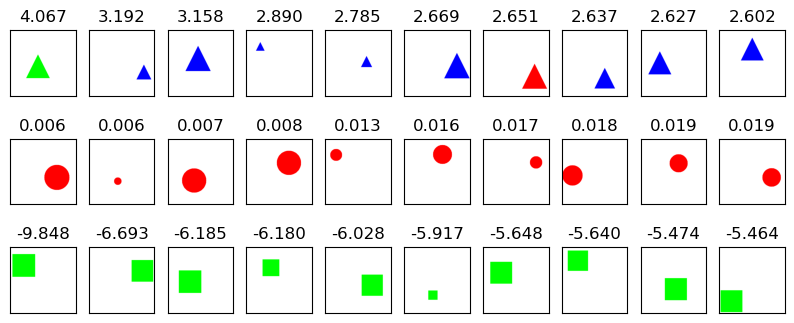

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. this: 0.1756
	2. that: 0.1627
	3. the: 0.1389
	4. red: 0.0910
	5. background: 0.0904
	6. solid: 0.0820
	7. triangular: 0.0809
	8. crimson: 0.0806
	9. round: 0.0780
	10. scarlet: 0.0752
	11. canvas: 0.0728
	12. no: 0.0692
	13. photo: 0.0691
	14. circular: 0.0677
	15. three: 0.0655
	16. unturn: 0.0630
	17. with: 0.0620
	18. image: 0.0617
	19. right: 0.0591
	20. outline: 0.0536
	21. picture: 0.0530
	22. quadratic: 0.0529
	23. angle: 0.0524
	24. lime: 0.0519
	25. corner: 0.0506
	26. transparent: 0.0490
	27. static: 0.0478
	28. white: 0.0476
	29. turn: 0.0457
	30. shape: 0.0456
	31. shade: 0.0450
	32. green: 0.0447
	33. blank: 0.0430
	34. rotate: 0.0413
	35. left: 0.0408
	36. cyan: 0.0406
	37. position: 0.0400
	38. color: 0.0390
	39. bottom: 0.0362
	40. unrotate: 0.0358
	41. olive: 0.0343
	42. in: 0.0334
	43. az

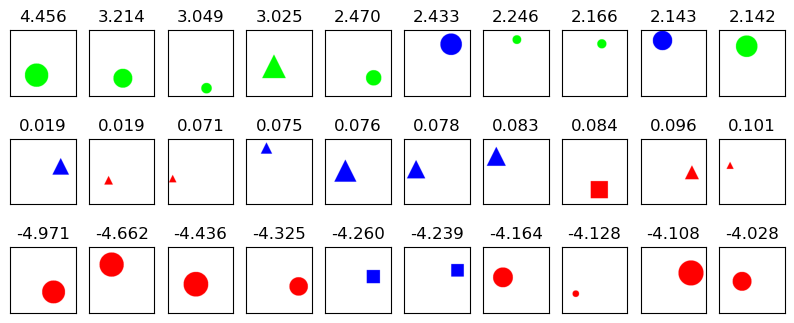

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. triangular: 0.0793
	2. three: 0.0730
	3. green: 0.0715
	4. blue: 0.0686
	5. lime: 0.0671
	6. outline: 0.0644
	7. angle: 0.0644
	8. with: 0.0635
	9. corner: 0.0575
	10. azure: 0.0553
	11. quadratic: 0.0528
	12. that: 0.0513
	13. olive: 0.0509
	14. this: 0.0501
	15. the: 0.0482
	16. static: 0.0468
	17. unturn: 0.0463
	18. cyan: 0.0458
	19. rotate: 0.0447
	20. four: 0.0441
	21. circular: 0.0434
	22. right: 0.0425
	23. no: 0.0424
	24. turn: 0.0420
	25. color: 0.0412
	26. scarlet: 0.0411
	27. position: 0.0404
	28. round: 0.0392
	29. picture: 0.0381
	30. in: 0.0378
	31. red: 0.0373
	32. white: 0.0371
	33. left: 0.0365
	34. image: 0.0355
	35. locate: 0.0355
	36. shade: 0.0352
	37. unrotate: 0.0345
	38. fix: 0.0335
	39. bottom: 0.0330
	40. photo: 0.0326
	41. up: 0.0323
	42. solid: 0.0316
	43. shape: 0.0314
	44. cri

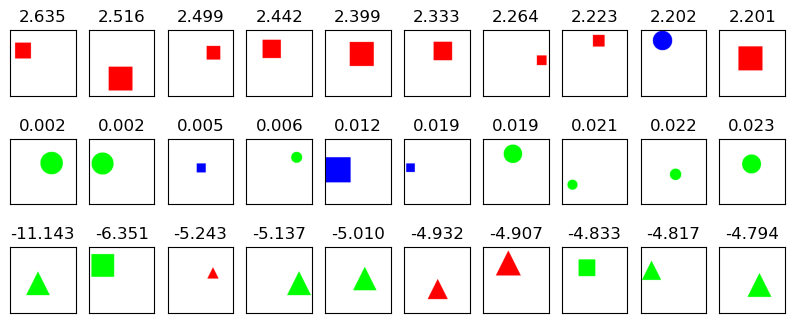

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. figure: 0.1314
	2. four: 0.1143
	3. form: 0.1091
	4. azure: 0.1032
	5. up: 0.1008
	6. static: 0.0960
	7. shape: 0.0958
	8. left: 0.0951
	9. bottom: 0.0945
	10. white: 0.0925
	11. locate: 0.0912
	12. fix: 0.0911
	13. unturn: 0.0867
	14. blue: 0.0866
	15. blank: 0.0860
	16. cyan: 0.0855
	17. unrotate: 0.0842
	18. rotate: 0.0838
	19. shade: 0.0826
	20. position: 0.0797
	21. angle: 0.0788
	22. picture: 0.0778
	23. corner: 0.0747
	24. color: 0.0747
	25. outline: 0.0738
	26. in: 0.0723
	27. circular: 0.0719
	28. transparent: 0.0706
	29. right: 0.0684
	30. turn: 0.0625
	31. scarlet: 0.0622
	32. lime: 0.0597
	33. with: 0.0596
	34. solid: 0.0590
	35. image: 0.0578
	36. photo: 0.0568
	37. green: 0.0562
	38. no: 0.0536
	39. round: 0.0535
	40. red: 0.0526
	41. triangular: 0.0517
	42. three: 0.0480
	43. crimson: 0.0460


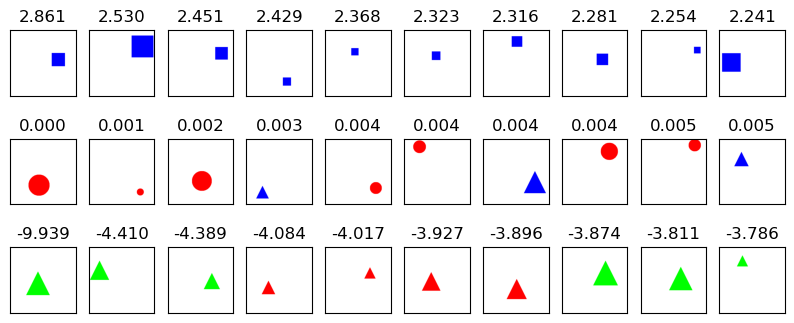

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. is: 0.2679
	2. have: 0.2364
	3. background: 0.1724
	4. olive: 0.1699
	5. quadratic: 0.1699
	6. canvas: 0.1680
	7. crimson: 0.1056
	8. triangular: 0.0869
	9. green: 0.0852
	10. turn: 0.0813
	11. scarlet: 0.0794
	12. lime: 0.0774
	13. three: 0.0707
	14. rotate: 0.0692
	15. red: 0.0687
	16. photo: 0.0658
	17. in: 0.0627
	18. transparent: 0.0595
	19. image: 0.0554
	20. position: 0.0543
	21. round: 0.0538
	22. the: 0.0537
	23. no: 0.0528
	24. outline: 0.0526
	25. angle: 0.0520
	26. right: 0.0491
	27. unturn: 0.0486
	28. this: 0.0483
	29. static: 0.0481
	30. blue: 0.0452
	31. white: 0.0444
	32. unrotate: 0.0440
	33. with: 0.0433
	34. picture: 0.0428
	35. that: 0.0417
	36. solid: 0.0416
	37. cyan: 0.0400
	38. circular: 0.0376
	39. blank: 0.0361
	40. color: 0.0359
	41. azure: 0.0357
	42. fix: 0.0351
	43. corner: 0.

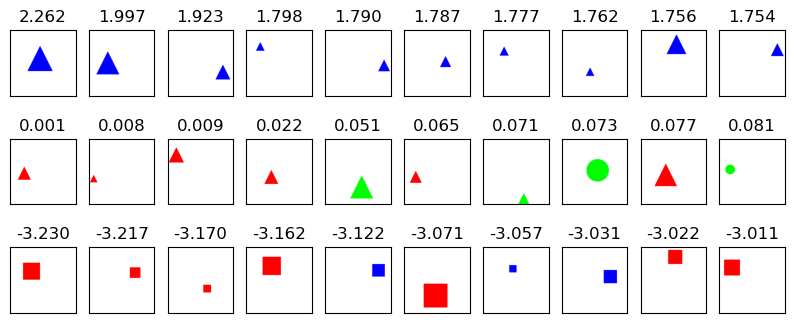

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. this: 0.1520
	2. that: 0.1324
	3. the: 0.1114
	4. triangular: 0.0867
	5. three: 0.0765
	6. angle: 0.0709
	7. outline: 0.0665
	8. corner: 0.0663
	9. green: 0.0595
	10. red: 0.0593
	11. lime: 0.0593
	12. with: 0.0585
	13. unturn: 0.0525
	14. scarlet: 0.0524
	15. solid: 0.0515
	16. right: 0.0510
	17. quadratic: 0.0460
	18. image: 0.0448
	19. static: 0.0447
	20. circular: 0.0447
	21. round: 0.0443
	22. olive: 0.0440
	23. picture: 0.0437
	24. blue: 0.0431
	25. azure: 0.0429
	26. turn: 0.0426
	27. photo: 0.0426
	28. no: 0.0425
	29. crimson: 0.0415
	30. cyan: 0.0414
	31. background: 0.0406
	32. color: 0.0398
	33. rotate: 0.0394
	34. canvas: 0.0380
	35. position: 0.0378
	36. shape: 0.0375
	37. left: 0.0373
	38. white: 0.0370
	39. shade: 0.0369
	40. locate: 0.0356
	41. in: 0.0336
	42. unrotate: 0.0323
	43. blank: 0.

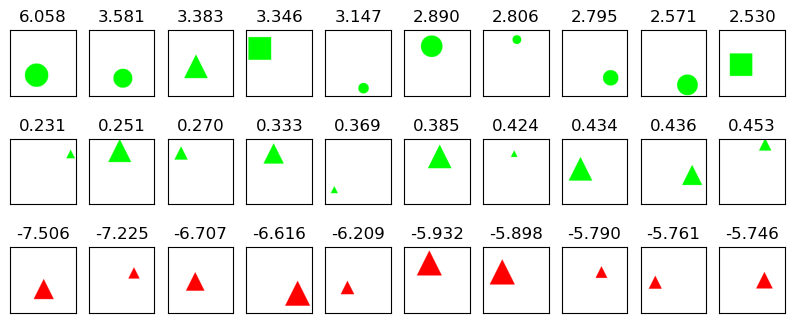

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. form: 0.1124
	2. fix: 0.1036
	3. figure: 0.1032
	4. up: 0.0995
	5. bottom: 0.0993
	6. shape: 0.0979
	7. locate: 0.0971
	8. color: 0.0964
	9. blank: 0.0961
	10. unrotate: 0.0960
	11. position: 0.0917
	12. left: 0.0913
	13. shade: 0.0911
	14. transparent: 0.0880
	15. picture: 0.0837
	16. image: 0.0834
	17. solid: 0.0834
	18. white: 0.0811
	19. in: 0.0810
	20. four: 0.0786
	21. right: 0.0777
	22. circular: 0.0773
	23. photo: 0.0771
	24. turn: 0.0765
	25. cyan: 0.0751
	26. static: 0.0744
	27. rotate: 0.0740
	28. blue: 0.0732
	29. round: 0.0705
	30. red: 0.0695
	31. no: 0.0693
	32. unturn: 0.0689
	33. crimson: 0.0683
	34. corner: 0.0672
	35. azure: 0.0666
	36. scarlet: 0.0655
	37. angle: 0.0563
	38. outline: 0.0562
	39. with: 0.0510
	40. lime: 0.0428
	41. the: 0.0418
	42. triangular: 0.0404
	43. canvas: 0.0388
	

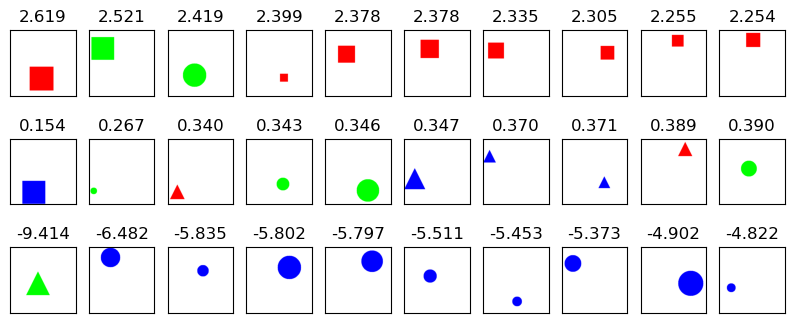

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. three: 0.0533
	2. triangular: 0.0520
	3. with: 0.0512
	4. outline: 0.0504
	5. no: 0.0495
	6. cyan: 0.0493
	7. lime: 0.0492
	8. angle: 0.0486
	9. azure: 0.0481
	10. the: 0.0470
	11. green: 0.0467
	12. blue: 0.0467
	13. circular: 0.0462
	14. round: 0.0449
	15. that: 0.0445
	16. scarlet: 0.0441
	17. corner: 0.0436
	18. unturn: 0.0432
	19. right: 0.0429
	20. shade: 0.0428
	21. red: 0.0423
	22. photo: 0.0415
	23. four: 0.0415
	24. rotate: 0.0415
	25. static: 0.0413
	26. turn: 0.0412
	27. shape: 0.0411
	28. position: 0.0411
	29. picture: 0.0410
	30. this: 0.0409
	31. image: 0.0405
	32. solid: 0.0404
	33. color: 0.0395
	34. unrotate: 0.0393
	35. quadratic: 0.0390
	36. crimson: 0.0389
	37. in: 0.0388
	38. transparent: 0.0386
	39. locate: 0.0385
	40. left: 0.0385
	41. up: 0.0379
	42. bottom: 0.0378
	43. white: 0.037

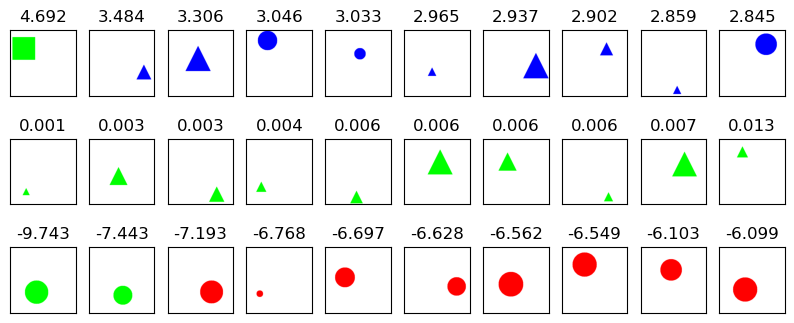

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. round: 0.1301
	2. circular: 0.1172
	3. no: 0.0991
	4. image: 0.0696
	5. with: 0.0685
	6. solid: 0.0648
	7. photo: 0.0559
	8. color: 0.0549
	9. red: 0.0522
	10. crimson: 0.0491
	11. shade: 0.0469
	12. triangular: 0.0465
	13. fix: 0.0464
	14. three: 0.0462
	15. picture: 0.0459
	16. position: 0.0446
	17. left: 0.0437
	18. transparent: 0.0426
	19. locate: 0.0422
	20. blank: 0.0417
	21. right: 0.0415
	22. scarlet: 0.0412
	23. unrotate: 0.0386
	24. bottom: 0.0374
	25. four: 0.0371
	26. white: 0.0354
	27. up: 0.0322
	28. corner: 0.0310
	29. turn: 0.0304
	30. the: 0.0297
	31. that: 0.0277
	32. background: 0.0275
	33. in: 0.0271
	34. this: 0.0268
	35. unturn: 0.0263
	36. static: 0.0263
	37. rotate: 0.0237
	38. form: 0.0236
	39. blue: 0.0226
	40. cyan: 0.0225
	41. lime: 0.0218
	42. shape: 0.0204
	43. canvas: 0.0203
	

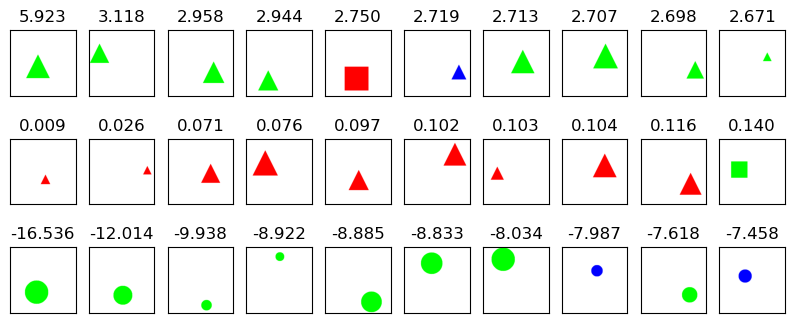

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. have: 0.2502
	2. is: 0.1957
	3. green: 0.1480
	4. quadratic: 0.1425
	5. olive: 0.1410
	6. lime: 0.1222
	7. canvas: 0.1008
	8. azure: 0.0915
	9. cyan: 0.0871
	10. outline: 0.0860
	11. background: 0.0850
	12. blue: 0.0796
	13. angle: 0.0752
	14. three: 0.0708
	15. turn: 0.0697
	16. rotate: 0.0673
	17. in: 0.0668
	18. triangular: 0.0656
	19. this: 0.0622
	20. the: 0.0582
	21. unturn: 0.0554
	22. crimson: 0.0515
	23. scarlet: 0.0513
	24. static: 0.0511
	25. that: 0.0507
	26. right: 0.0495
	27. shape: 0.0493
	28. transparent: 0.0482
	29. photo: 0.0447
	30. with: 0.0425
	31. position: 0.0416
	32. white: 0.0407
	33. red: 0.0399
	34. corner: 0.0387
	35. unrotate: 0.0384
	36. up: 0.0384
	37. picture: 0.0367
	38. four: 0.0366
	39. no: 0.0355
	40. bottom: 0.0353
	41. shade: 0.0349
	42. blank: 0.0335
	43. image: 0.033

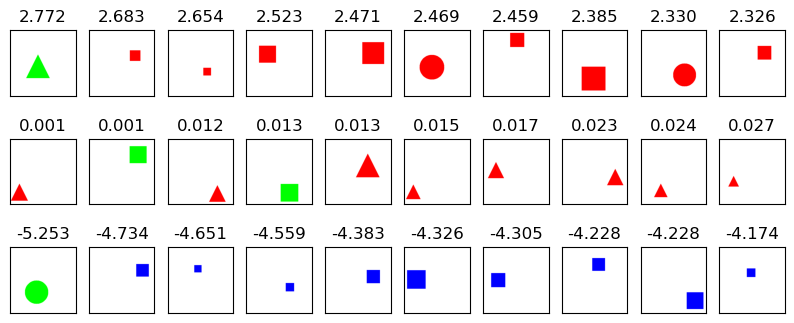

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. figure: 0.1299
	2. locate: 0.1168
	3. fix: 0.1117
	4. left: 0.1105
	5. form: 0.1019
	6. up: 0.0962
	7. blank: 0.0955
	8. bottom: 0.0951
	9. color: 0.0924
	10. white: 0.0920
	11. four: 0.0917
	12. unrotate: 0.0913
	13. circular: 0.0897
	14. blue: 0.0889
	15. picture: 0.0881
	16. position: 0.0868
	17. static: 0.0864
	18. corner: 0.0850
	19. shade: 0.0827
	20. unturn: 0.0792
	21. right: 0.0790
	22. shape: 0.0764
	23. azure: 0.0761
	24. solid: 0.0758
	25. image: 0.0742
	26. rotate: 0.0703
	27. transparent: 0.0700
	28. cyan: 0.0682
	29. with: 0.0681
	30. angle: 0.0665
	31. round: 0.0648
	32. in: 0.0646
	33. outline: 0.0627
	34. turn: 0.0624
	35. no: 0.0601
	36. photo: 0.0592
	37. triangular: 0.0537
	38. red: 0.0503
	39. three: 0.0492
	40. scarlet: 0.0492
	41. lime: 0.0455
	42. the: 0.0408
	43. that: 0.0401
	44.

IndexError: list index out of range

In [6]:
for i in range(51):
    visualize_concept(i)